# **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#Reading the data from the csv file
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Describe the dataset

data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
#Checking for missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Since there is no missing values in the dataset, we are good to carry on with the process.**

In [5]:
#checking for unique Spices
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# **Feature Selection**

In [6]:
#Features
X = data.iloc[:, [1,2,3,4]]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#Label
#Mapping the Species Data
Y = data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [9]:
from sklearn.cluster import KMeans

#Finding the differnt k values
SSE = []
for k in range(1,20):
  km = KMeans(n_jobs=-1, n_clusters=k)
  km.fit(X, Y)
  SSE.append(km.inertia_)

SSE

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.95701115711985,
 34.31116758986839,
 29.88917890442891,
 27.8873865914787,
 26.049684704184706,
 24.82735858585859,
 23.231592171717175,
 21.615439393939397,
 20.153637426900588,
 19.32119047619048,
 18.3924194612577,
 16.704567071817074,
 16.266593406593408,
 15.830479961215257]

In [10]:
#Storing the data in a DataFrame
frame = pd.DataFrame({'Clusters': range(1,20), 'SSE' :SSE })
frame

,Clusters,SSE
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.957011
6,7,34.311168
7,8,29.889179
8,9,27.887387
9,10,26.049685


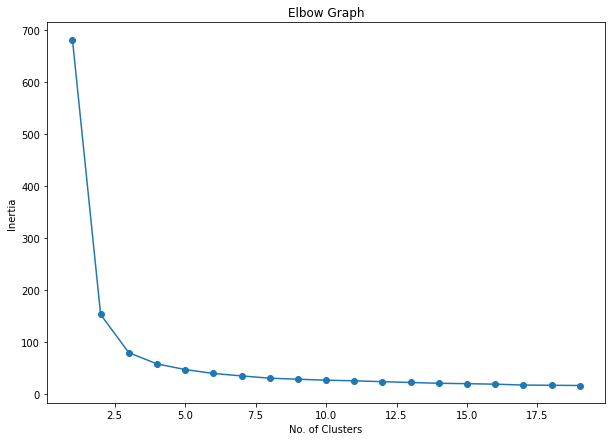

In [11]:
#Plotting the Elbow Curve
plt.figure(figsize=(10,7))
plt.plot(frame.Clusters, frame.SSE, marker='o')
plt.title('Elbow Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

From this graph, we choose the number of clusters as **3**.

In [12]:
km = KMeans(n_clusters=3)
km.fit(X, Y)
y_pred = km.predict(X)

In [13]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
#Iris-setosa:0, Iris-versicolor:1, Iris-virginica:2
yc = Y.map({0:'yellow',1:'blue', 2:'green'})

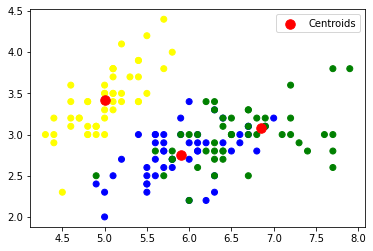

In [15]:
plt.scatter(X.iloc[:,0], X.iloc[:,1] ,c=yc )
# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s=90, c = 'red', label = 'Centroids')

plt.legend()